In [71]:
#  Install Requried Packages
installed.packages("SnowballC") #Textmining
installed.packages("tm") #Textanalysis
installed.packages("rtweet") #extracting twitter data
installed.packages("syuzhet") #sentiment analysis
library(ggplot2)
library(lubridate)
 
# Load Requried Packages
library("SnowballC")
library("tm")
library("rtweet")
library("syuzhet")
library("stringr")
library("dplyr")
devtools::install_github("mkearney/rtweet")

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built



Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Skipping install of 'rtweet' from a github remote, the SHA1 (ecb1db92) has not changed since last install.
  Use `force = TRUE` to force installation


In [4]:
# Authonitical keys
#consumer_key <- 'XXX'
#consumer_secret <- 'XXX'
#access_token <- 'XXX'
#access_secret <- 'XXXX'
#setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

In [5]:
# Date YYYY-MM-DD | Lat : 35.99990 Long : -78.90669 )
# tweets <- searchTwitter("", n=30000, since = "2018-07-21", until = "2018-07-22", geocode='35.99990,-78.90669,20mi',  retryOnRateLimit=120)

# n.tweet <- length(tweets)
# n.tweet

In [6]:
#Making Tweets into a dataframe
#tweets.df <- twListToDF(tweets) 

In [9]:
#write.csv(tweets.df, file="NCtweets22july18.csv")
tweets.df <- read.csv("NCtweets22july18.csv")
nrow(tweets.df)

[1] 30000

In [51]:
#head(tweets.df, 40)

In [11]:
#Cleaning up the tweets themselves to do sentiment analysis
tweets.df2 = gsub("&amp", "", tweets.df$text)
tweets.df2 = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", "", tweets.df2)
tweets.df2 = gsub("@\\w+", "", tweets.df2)
tweets.df2 = gsub("[[:punct:]]", "", tweets.df2)
tweets.df2 = gsub("[[:digit:]]", "", tweets.df2)
tweets.df2 = gsub("http\\w+", "", tweets.df2)
tweets.df2 = gsub("[ \t]{2,}", "", tweets.df2)
tweets.df2 = gsub("^\\s+|\\s+$", "", tweets.df2) 

In [12]:
head(tweets.df2)

[1] "liespeopletellthemselvesCrookedHillary is healthy"                                      
[2] "dirt road days before school"                                                           
[3] "No better way to start my morning"                                                      
[4] "shoutout to babydaddypaulruddlikefinewine clueless"                                     
[5] "Or you know Hold the president to the same level as movie directors"                    
[6] "Every basic viral girly relationship goals tweet comes from a girl who goes to Texas St"

In [13]:
#Applying sentiment analysis library
word.df <- as.vector(tweets.df2)
emotion.df <- get_nrc_sentiment(word.df)
emotion.df2 <- cbind(tweets.df2, emotion.df) 
head(emotion.df2)

tweets.df2,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
liespeopletellthemselvesCrookedHillary is healthy,0,0,0,0,0,0,0,0,0,1
dirt road days before school,0,0,1,0,0,0,0,1,1,0
No better way to start my morning,0,1,0,0,0,0,0,0,0,0
shoutout to babydaddypaulruddlikefinewine clueless,0,0,0,0,0,0,0,0,0,0
Or you know Hold the president to the same level as movie directors,0,0,0,0,0,0,0,2,0,2
Every basic viral girly relationship goals tweet comes from a girl who goes to Texas St,0,0,0,0,0,0,0,0,0,0


In [14]:
# Creating an overall positivity score
sent.value <- get_sentiment(word.df)
# Most positive tweet
most.positive <- word.df[sent.value == max(sent.value)]
most.positive

[1] "Hello TwitterverseHope youre having a Marvelous Terrific Wonderful Thankful Fabulous Sensational and Blessed Day"

In [15]:
# Most negative tweet
most.negative <- word.df[sent.value <= min(sent.value)] 
most.negative 
most.positive

[1] "Dont worry beneath my stoned Eeyorewithacold demeanor lurks just as much anxiety and stress as the rest of yall"

[1] "Hello TwitterverseHope youre having a Marvelous Terrific Wonderful Thankful Fabulous Sensational and Blessed Day"

In [16]:
# Creating set of positive tweets
positive.tweets <- word.df[sent.value > 0]
head(positive.tweets)

[1] "liespeopletellthemselvesCrookedHillary is healthy"                                                    
[2] "No better way to start my morning"                                                                    
[3] "Or you know Hold the president to the same level as movie directors"                                  
[4] "Back atchya I appreciate following you and wish you all the good that you deserve lt"                 
[5] "Growing upSomethings verrrrrrrry interesting doh"                                                     
[6] "getting ready to head to to San Antonio TX for THSCA Look forward to seeing everyone Everything is bi"

In [17]:
# Creating set of negative tweets
negative.tweets <- word.df[sent.value < 0]
head(negative.tweets)

[1] "dirt road days before school"                                                           
[2] "shoutout to babydaddypaulruddlikefinewine clueless"                                     
[3] "Every basic viral girly relationship goals tweet comes from a girl who goes to Texas St"
[4] "liespeopletellthemselves If Trump is elected Im moving to Canada"                       
[5] "Dont stress yourself"                                                                   
[6] "A this is stupid to even compare them \nB let me know when Britney writes a song or pla"

In [18]:
# Creating set of neutral tweets
neutral.tweets <- word.df[sent.value == 0]
head(neutral.tweets)

[1] "Im not at this game BTW Listeners ofprobably know why"    
[2] "I added a video to aplaylistAcrylic pouring the wave"     
[3] ""                                                         
[4] "Aint had no khill in awhile"                              
[5] "VINCEDOTTIShazam SaturdayMotivation ชีวิตรอดแล้ว日本代表SDCC"
[6] "This Little Girl"

In [19]:
# Alternate way to classify as Positive, Negative or Neutral tweets
category_senti <- ifelse(sent.value < 0, "Negative", ifelse(sent.value > 0, "Positive", "Neutral"))
head(category_senti)

[1] "Positive" "Negative" "Positive" "Negative" "Positive" "Negative"

In [35]:
# Creating Sentiment Dataset
category_senti2 <- cbind(emotion.df2, category_senti, sent.value)

In [38]:
# Adding back in other potentially useful variables
df <- cbind(tweets.df, category_senti2)

In [49]:
df1 <- df  %>% select('favorited','favoriteCount','created','isRetweet','retweetCount', 'retweeted', 'tweets.df2':'sent.value')

In [50]:
head(df1)

favorited,favoriteCount,created,isRetweet,retweetCount,retweeted,tweets.df2,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,category_senti,sent.value
FALSE,0,2018-07-21 23:59:55,FALSE,0,FALSE,liespeopletellthemselvesCrookedHillary is healthy,0,0,0,0,0,0,0,0,0,1,Positive,0.75
FALSE,1,2018-07-21 23:59:53,FALSE,1,FALSE,dirt road days before school,0,0,1,0,0,0,0,1,1,0,Negative,-0.75
FALSE,0,2018-07-21 23:59:52,TRUE,4846,FALSE,No better way to start my morning,0,1,0,0,0,0,0,0,0,0,Positive,0.80
FALSE,0,2018-07-21 23:59:48,FALSE,0,FALSE,shoutout to babydaddypaulruddlikefinewine clueless,0,0,0,0,0,0,0,0,0,0,Negative,-0.50
FALSE,1,2018-07-21 23:59:43,FALSE,0,FALSE,Or you know Hold the president to the same level as movie directors,0,0,0,0,0,0,0,2,0,2,Positive,0.40
FALSE,0,2018-07-21 23:59:42,FALSE,0,FALSE,Every basic viral girly relationship goals tweet comes from a girl who goes to Texas St,0,0,0,0,0,0,0,0,0,0,Negative,-0.25


In [105]:
# Adding Neutral
df1$neutral <- ifelse(df1$category_senti=="Neutral", 1, 0)

In [55]:
# Fixing Dates | as.POSIXct() - %Y-%m-%d %H:%M:%S
class(df1$created)
df1$date <- as.POSIXct(df1$created)

[1] "factor"

In [106]:
summary(df1)

 favorited       favoriteCount                   created      isRetweet      
 Mode :logical   Min.   :   0.0   2018-07-21 19:00:06:   10   Mode :logical  
 FALSE:30000     1st Qu.:   0.0   2018-07-21 16:08:11:    7   FALSE:15214    
                 Median :   0.0   2018-07-21 19:29:37:    7   TRUE :14786    
                 Mean   :   1.8   2018-07-21 22:57:15:    7                  
                 3rd Qu.:   0.0   2018-07-21 17:31:07:    6                  
                 Max.   :3203.0   2018-07-21 17:38:08:    6                  
                                  (Other)            :29957                  
  retweetCount   retweeted      
 Min.   :    0   Mode :logical  
 1st Qu.:    0   FALSE:30000    
 Median :    1                  
 Mean   : 1417                  
 3rd Qu.:  180                  
 Max.   :92073                  
                                
                                                                                                                

In [90]:
CPR <- df1  %>% group_by(time=floor_date(date, "15 minutes"))  %>% summarise(critical_positivity_ratio = sum(positive)/sum(negative))

In [91]:
head(CPR)

time,critical_positivity_ratio
2018-07-21 16:00:00,2.319403
2018-07-21 16:15:00,2.405172
2018-07-21 16:30:00,2.550820
2018-07-21 16:45:00,2.252778
2018-07-21 17:00:00,3.582278
2018-07-21 17:15:00,2.525680


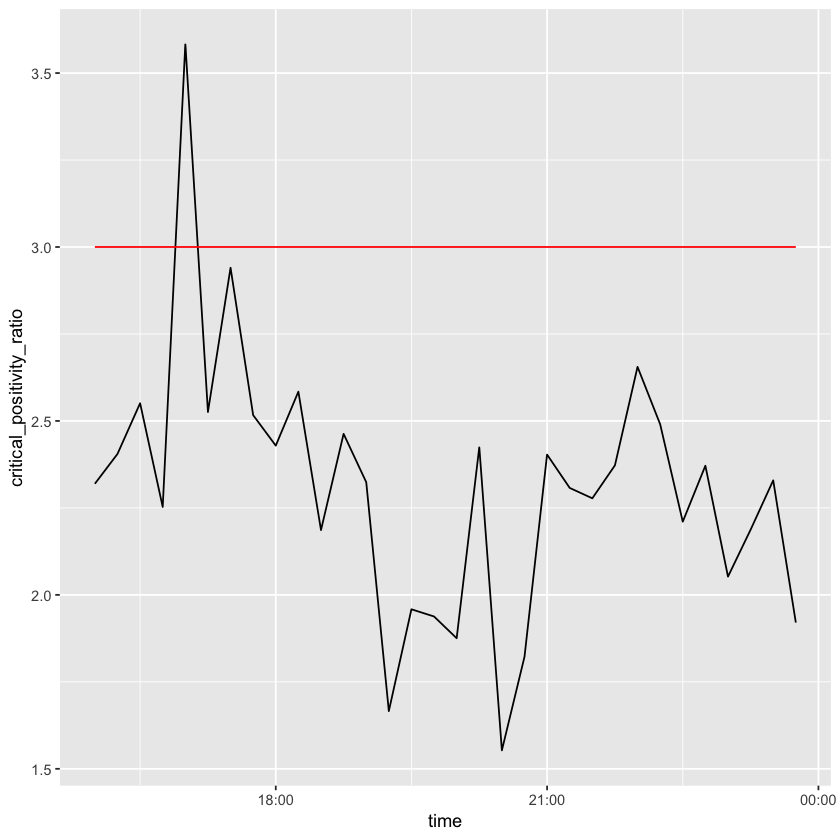

In [92]:
ggplot(data=CPR, aes(x=time, y=critical_positivity_ratio)) + geom_line() + geom_line(y=3, col="red")

In [107]:
#emotions <- df1  %>% group_by(time=floor_date(date, "15 minutes"))  %>% summarise(anger = sum(anger), anticipation = sum(anticipation), disgust = sum(disgust), fear = sum(fear), joy = sum(joy), sadness = sum(sadness), surprise = sum(surprise), trust = sum(trust))
moods <- df1  %>% group_by(time=floor_date(date, "15 minutes"))  %>% summarise(positive = sum(positive), negative = sum(negative), neutral = sum(neutral))


In [109]:
head(moods)

time,positive,negative,neutral
2018-07-21 16:00:00,777,335,406
2018-07-21 16:15:00,837,348,359
2018-07-21 16:30:00,778,305,400
2018-07-21 16:45:00,811,360,308
2018-07-21 17:00:00,1132,316,344
2018-07-21 17:15:00,836,331,327


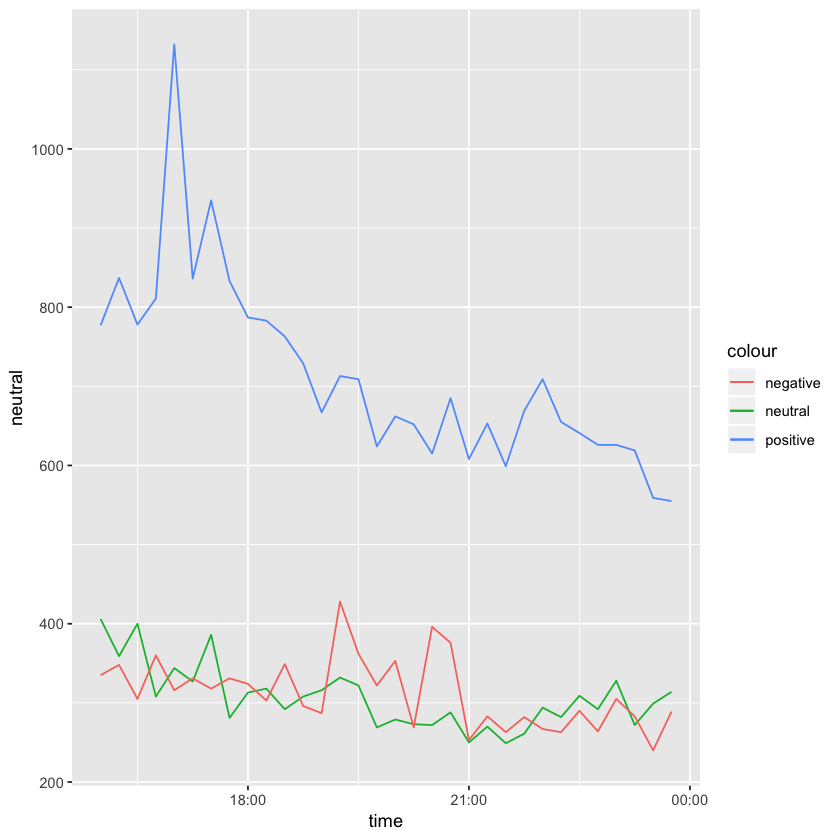

In [112]:
#mood <- c("anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust")
ggplot(data=moods, aes(x=time, y=neutral)) + geom_line(aes(col="neutral")) + geom_line(aes(x=time, y=positive, col="positive")) + 
geom_line(aes(x=time, y=negative, col="negative"))
